In [1]:
import lutorpy as lua

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10, 6]
mpl.rcParams['image.cmap'] = 'jet'

In [3]:
require("nn")
require("cudnn")
require("cunn")
require('torch')
require('cutorch')

<Lua table at 0x402f9db0>

In [4]:
model_path = "../model-best.net"
model = torch.load(model_path)

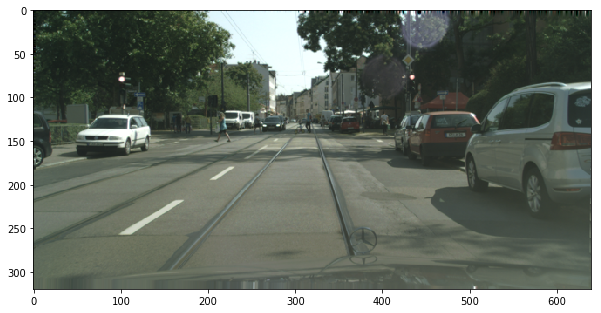

In [5]:
img = Image.open('frankfurt_000000_001236_leftImg8bit.png')
# img = Image.open('munster_000026_000019_leftImg8bit.png')

img = img.resize((640, 320), Image.BICUBIC)
img = np.asarray(img)
plt.imshow(img)

In [6]:
arr = img/255 # RGB
arr = arr.transpose(2,0,1)[np.newaxis]
arr.shape

(1, 3, 320, 640)

In [7]:
t = torch.fromNumpyArray(arr)
cudat = t._cuda()
yt = model._forward(cudat)
y = yt.asNumpyArray()[0]
label=y.argmax(axis=0)

In [8]:
label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

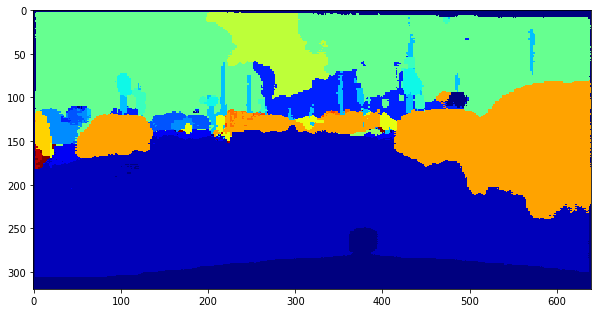

In [9]:
plt.imshow(label)

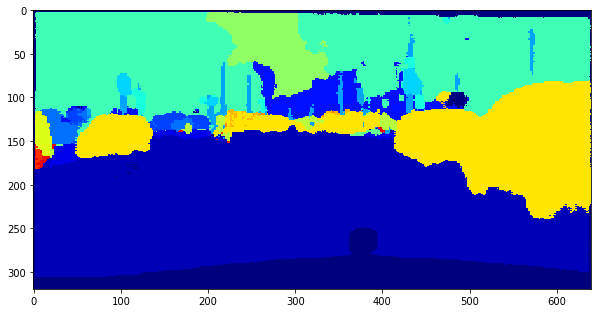

In [10]:
plt.imshow(label)
plt.clim(0,21)

In [11]:
im = Image.fromarray(np.uint8(label))
im.save('result_lutorpy.png')

# Color map
index image to rgb image

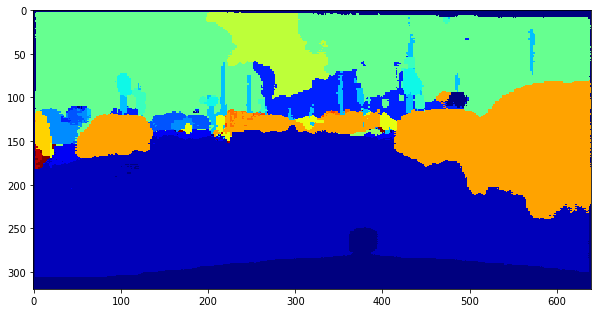

In [12]:
cmap=plt.imshow(label).cmap

In [13]:
for it in range(10):
  print(cmap(it))

(0.0, 0.0, 0.5, 1.0)
(0.0, 0.0, 0.517825311942959, 1.0)
(0.0, 0.0, 0.535650623885918, 1.0)
(0.0, 0.0, 0.553475935828877, 1.0)
(0.0, 0.0, 0.571301247771836, 1.0)
(0.0, 0.0, 0.589126559714795, 1.0)
(0.0, 0.0, 0.60695187165775399, 1.0)
(0.0, 0.0, 0.62477718360071299, 1.0)
(0.0, 0.0, 0.64260249554367199, 1.0)
(0.0, 0.0, 0.66042780748663099, 1.0)


In [14]:
cmap.N

256

In [15]:
label.max()

19

In [16]:
rgb_label = np.zeros((label.shape[0], label.shape[1], 3))
scale = cmap.N/label.max()
for it in range(label.max()+1):
  index = label==it
  rgb_label[index]=np.array(cmap(int(it*scale))[:3])

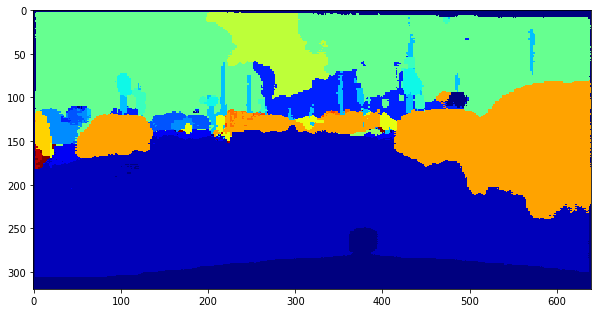

In [17]:
plt.imshow(rgb_label)

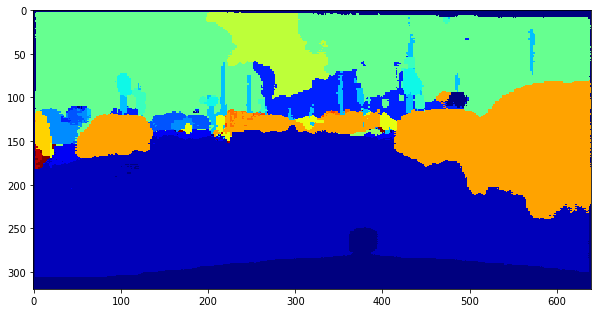

In [18]:
# save image
im = Image.fromarray(np.uint8(rgb_label*255))
im.save('result_label_rgb.png')
plt.imshow(im)

# Batch 

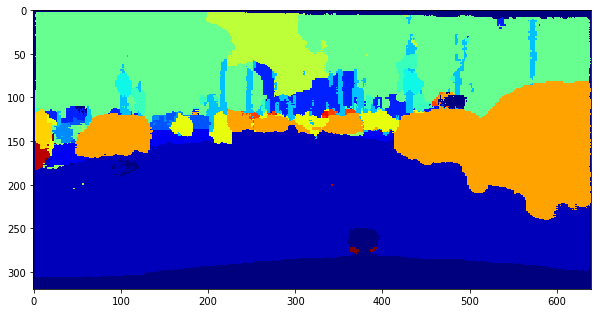

In [19]:
it = 120
model_path = "/home/komatsu/work/datasets/torch/enet/dec640/model-{}.net".format(it)
model = torch.load(model_path)
img = Image.open('frankfurt_000000_001236_leftImg8bit.png')
img = img.resize((640, 320), Image.BICUBIC)
img = np.asarray(img)
arr = img/255 # RGB
arr = arr.transpose(2,0,1)[np.newaxis]
t = torch.fromNumpyArray(arr)

# forward
cudat = t._cuda()
yt = model._forward(cudat)
y = yt.asNumpyArray()[0]
label=y.argmax(axis=0)

# index to rgb
rgb_label = np.zeros((label.shape[0], label.shape[1], 3))
scale = cmap.N/label.max()
for label_id in range(label.max()+1):
  rgb_label[label==label_id]=np.array(cmap(int(label_id*scale))[:3])

# save image
im = Image.fromarray(np.uint8(rgb_label*255))
im.save('result_label_rgb_{}.png'.format(it))
plt.imshow(rgb_label)

In [20]:
# prepare data
img = Image.open('frankfurt_000000_001236_leftImg8bit.png')
img = img.resize((640, 320), Image.BICUBIC)
img = np.asarray(img)
arr = img/255 # RGB
arr = arr.transpose(2,0,1)[np.newaxis]
t = torch.fromNumpyArray(arr)
cudat = t._cuda()

for it in range(1,300):
  # load model
  model_path = "/home/komatsu/work/datasets/torch/enet/dec640/model-{}.net".format(it)
#   print('load:', model_path)
  model = torch.load(model_path)
  
  # forward
  yt = model._forward(cudat)
  y = yt.asNumpyArray()[0]
  label=y.argmax(axis=0)
  
  # index to rgb
  rgb_label = np.zeros((label.shape[0], label.shape[1], 3))
  scale = cmap.N/label.max()
  for label_id in range(label.max()+1):
    rgb_label[label==label_id]=np.array(cmap(int(label_id*scale))[:3])
    
  # save image
  im = Image.fromarray(np.uint8(rgb_label*255))
  save_filename = './result_label_rgb_{}.png'.format(it)
#   im.save(save_filename)
#   print('save:', save_filename)
print('finish!')

finish!
